In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./data/node-data.csv")

In [3]:
clean_df = df[["Node", "Time", "LoadAvg", "MemoryFreeInactiveKB"]]

In [4]:
len(clean_df["Node"].unique())

731

In [5]:
# Use groupby and list comprehension for efficiency
node_dfs = [group.sort_values(by="Time", ascending=True) for _, group in clean_df.groupby("Node")]

In [6]:
# Sort the node_dfs list by the number of rows in each DataFrame, in descending order
node_dfs_sorted = sorted(node_dfs, key=lambda x: len(x), reverse=True)

len(node)

In [15]:
len(node_dfs_sorted)

731

In [18]:
len(node_dfs_sorted[726])

29485

In [36]:
max_node_dfs = 700

# Initialize the arrays for storing the max and min values
max_load_avg = []
max_mem_free = []
min_load_avg = []
min_mem_free = []

# Iterate over the first 700 (or fewer) DataFrames in node_dfs
for df in node_dfs_sorted[:max_node_dfs]:
    # Append the max and min values to the respective arrays
    max_load_avg.append(df["LoadAvg"].max())
    max_mem_free.append(df["MemoryFreeInactiveKB"].max())
    min_load_avg.append(df["LoadAvg"].min())
    min_mem_free.append(df["MemoryFreeInactiveKB"].min())

In [37]:
print(max(max_load_avg), min(max_load_avg))

4443.53 1.6


In [47]:
node_dfs_sorted[1].iloc[-1]

Node                    r629115-n386398
Time                       1633045801.0
LoadAvg                             2.6
MemoryFreeInactiveKB              357.0
Name: 34655276, dtype: object

In [48]:
node_dfs_sorted[2].iloc[-1]

Node                    r6760045-n976057
Time                        1633045801.0
LoadAvg                              3.1
MemoryFreeInactiveKB               382.0
Name: 34655258, dtype: object

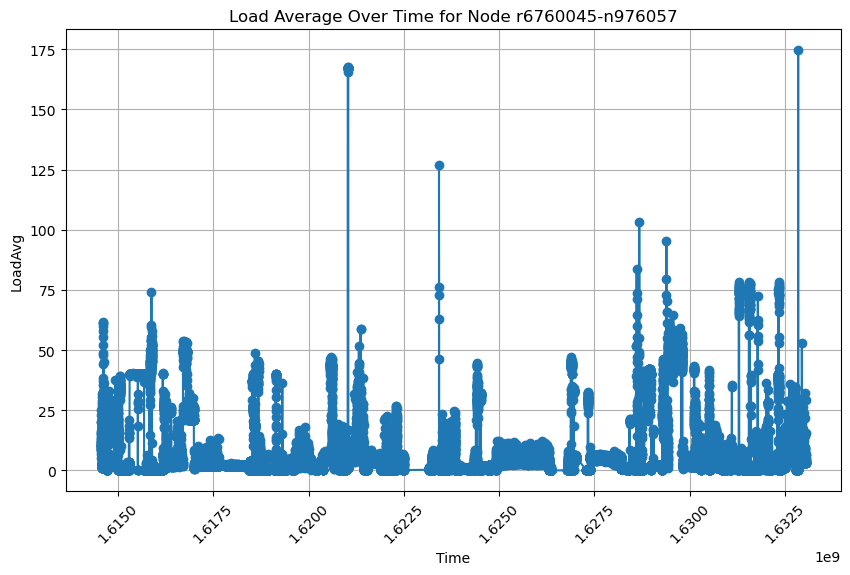

In [40]:
# Select the first DataFrame from the sorted list
df_to_plot = node_dfs_sorted[2]

# Ensure that 'Time' is in a format suitable for plotting
# If 'Time' is not already a datetime object, you can convert it as follows:
# df_to_plot['Time'] = pd.to_datetime(df_to_plot['Time'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_to_plot['Time'], df_to_plot['LoadAvg'], marker='o')
plt.title('Load Average Over Time for Node {}'.format(df_to_plot['Node'].iloc[0]))
plt.xlabel('Time')
plt.ylabel('LoadAvg')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

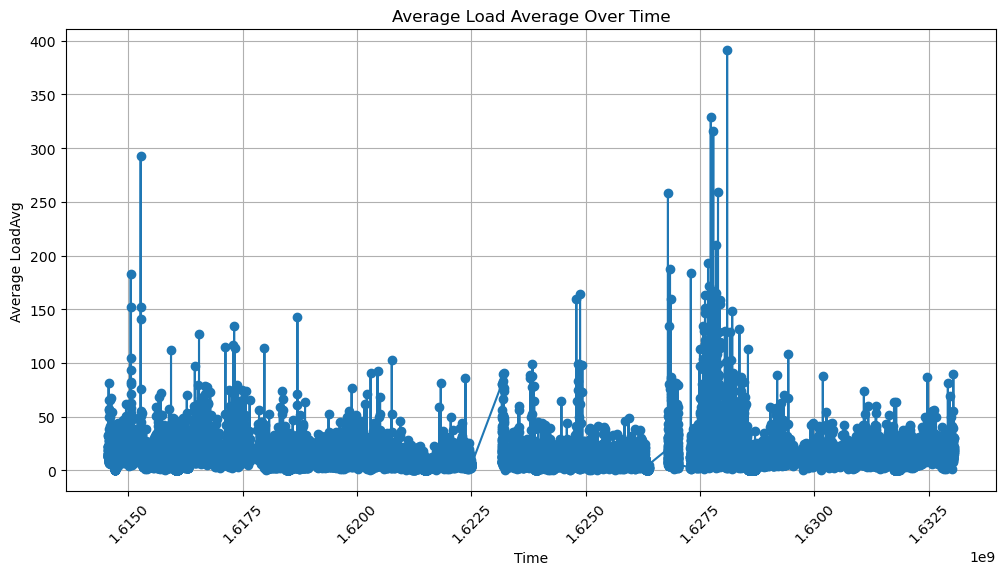

In [51]:
node_dfs_sorted_selected = node_dfs_sorted[:700]

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Concatenate all DataFrames with an additional node identifier
all_dfs = pd.concat([df.assign(node_id=idx) for idx, df in enumerate(node_dfs_sorted_selected)], ignore_index=True)

# Step 2: Group by 'Time' and calculate the mean of 'LoadAvg'
grouped = all_dfs.groupby('Time')['LoadAvg'].mean().reset_index()

# Step 3: Merge with the 'Time' column of the first DataFrame to filter the time points
filtered_grouped = pd.merge(node_dfs_sorted_selected[0][['Time']].drop_duplicates(), grouped, on='Time', how='left')

# Step 4: Plotting
plt.figure(figsize=(12, 6))
plt.plot(filtered_grouped['Time'], filtered_grouped['LoadAvg'], marker='o')
plt.title('Average Load Average Over Time')
plt.xlabel('Time')
plt.ylabel('Average LoadAvg')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

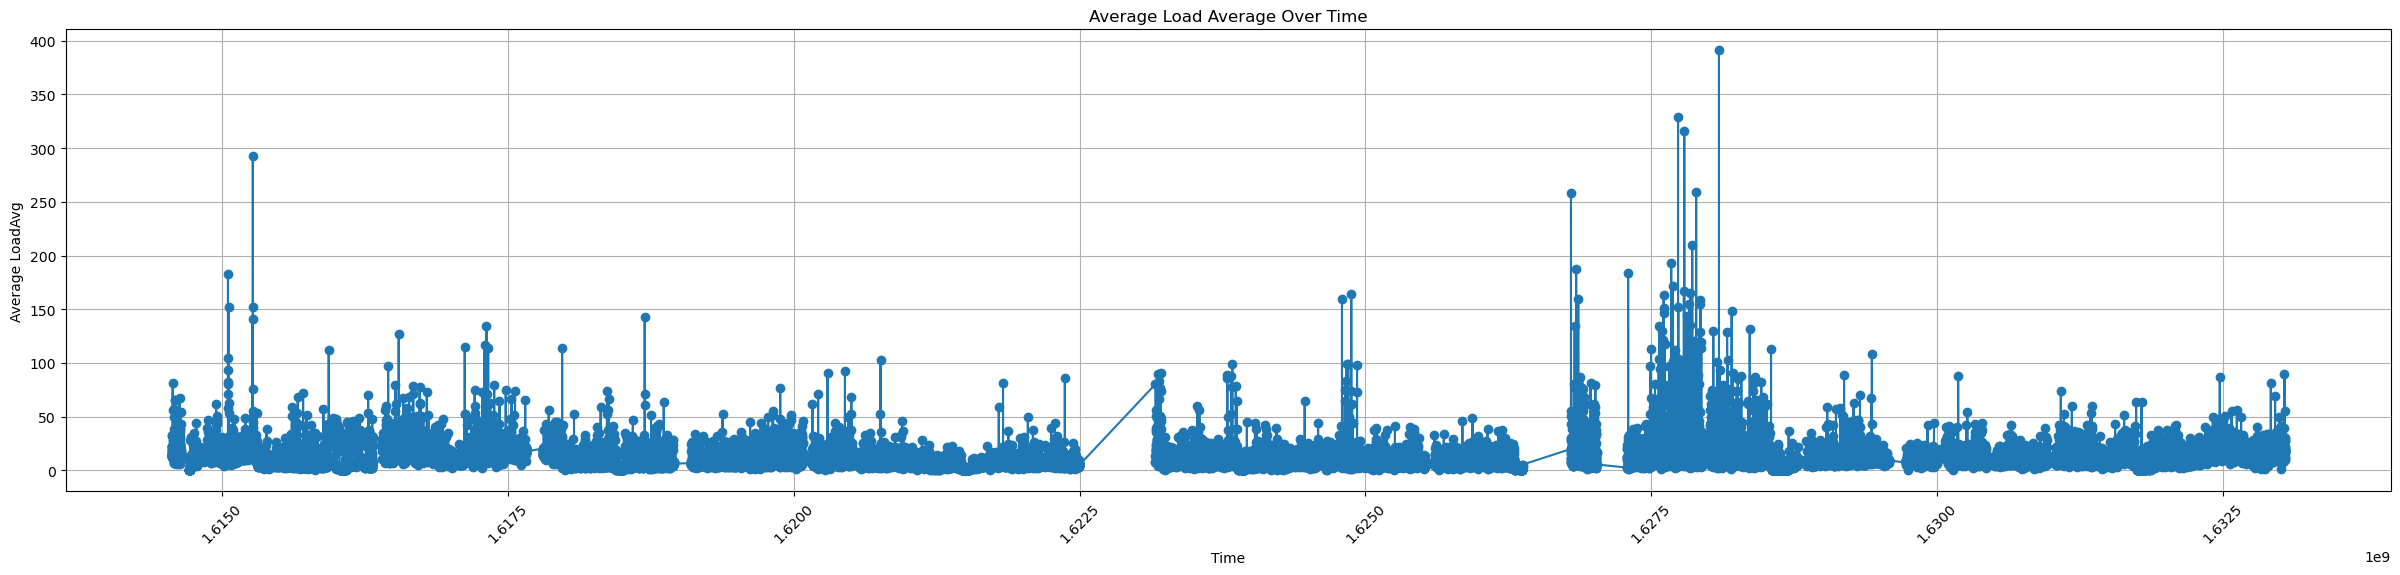

In [53]:
plt.figure(figsize=(30, 6))
plt.plot(filtered_grouped['Time'], filtered_grouped['LoadAvg'], marker='o')
plt.title('Average Load Average Over Time')
plt.xlabel('Time')
plt.ylabel('Average LoadAvg')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()